In [1]:
import matplotlib.pylab as pl
%matplotlib inline
import numpy as np
import cPickle as pickle

In [2]:
SHAPES = ('1024',) * 4 + ('10',)

In [4]:
interval = 8
histories = {}
for i in range(8):
    histories[interval] = pickle.load(
        open('mlp-dr-loss-interval-%d-shape-%s' % (interval, '-'.join(SHAPES)), 'rb')
    )
    interval *= 2
normal_history = pickle.load(open('model/mlp-loss-normal-shape-1024-1024-1024-1024-10', 'rb'))
bn_history = pickle.load(open('model/mlp-loss-bn-shape-1024-1024-1024-1024-10', 'rb'))

IOError: [Errno 2] No such file or directory: 'mlp-dr-loss-interval-1024-shape-1024-1024-1024-1024-10'

NameError: name 'normal_history' is not defined

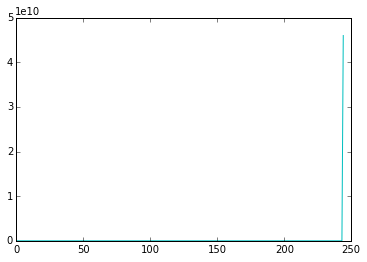

In [5]:
ITERATIONS = 25000
STEPS = 100
for key in sorted(histories.keys()):
    pl.plot(range(ITERATIONS / STEPS), histories[key][::STEPS], label='interval %d' % key)
pl.plot(range(ITERATIONS / STEPS), normal_history[::STEPS], label='normal')
pl.plot(range(ITERATIONS / STEPS), bn_history[::STEPS], label='bn')
pl.ylim(0, 3)
pl.grid()
pl.legend(framealpha=0)